In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [33]:
bipolar_path = '/content/drive/My Drive/bipolar/bipolar/'
non_bipolar_path = '/content/drive/My Drive/bipolar/non_bipolar/'
print(bipolar_path)
print(non_bipolar_path)

/content/drive/My Drive/bipolar/bipolar/
/content/drive/My Drive/bipolar/non_bipolar/


In [5]:
print(os.listdir(bipolar_path))
print(os.listdir(non_bipolar_path))

['bf55756.png', 'bf342353.png', 'bm2.png', 'bi1m.png', 'bm4.png', 'bm63423.png', 'bf67567.png', 'bm754456.png', 'bm132.png', 'bf789783.png', 'bm121213.png', 'bm3.png', 'bm575656.png', 'bm65756.png', 'bf56454.png', 'bm786785.png', 'bm7676.png']
['nf1211.png', 'n12.png', 'nf12.png', 'nf14.png', 'nf15.png', 'nf13131.png', 'nf.png', 'nf1231313.png', 'nf13.png', 'nf11.png', 'nf10.png', 'nf2123.png', 'nf25.png', 'nf45t45.png', 'nf16.png', 'nf4233.png', 'nf22.png', 'nf24.png', 'nf23.png', 'nf2.png', 'nf33.png', 'nf4.png', 'nf3.png', 'nf2323.png', 'nf41212.png', 'nf6666575.png', 'nf5555.png', 'nf77.png', 'nf5646.png', 'nf89789.png', 'nm11.png', 'nf5.png', 'nf78777.png', 'nf9.png', 'nf7896.png', 'nf907.png', 'nf8.png', 'nf6.png', 'nm665567.png', 'nm2311.png', 'nm4234234.png', 'nm19.png', 'nm7.png', 'nm45434.png', 'nm73456.png', 'nm342342342.png', 'nm654.png', 'nm67464.png', 'nm42342.png', 'nm4342.png', 'nm12.png', 'nm54577.png', 'nm34534.png', 'nm89876.png', 'nm9.png', 'nm78978.png']


In [34]:
def display_images(image_paths, title):
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(image_paths):
        plt.subplot(1, 5, i+1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

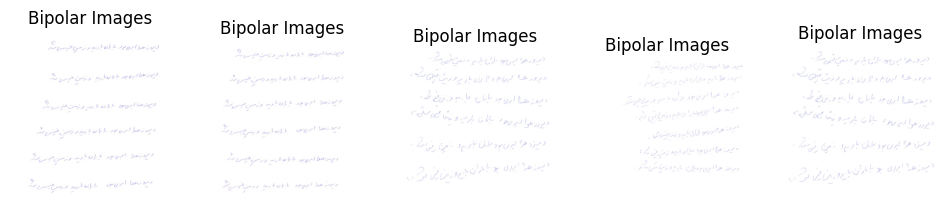

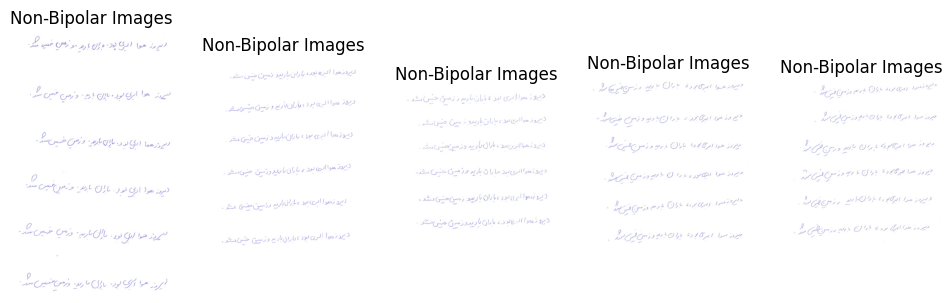

In [35]:
bipolar_images = [os.path.join(bipolar_path, img) for img in os.listdir(bipolar_path)[:5]]
non_bipolar_images = [os.path.join(non_bipolar_path, img) for img in os.listdir(non_bipolar_path)[:5]]
display_images(bipolar_images, title="Bipolar Images")
display_images(non_bipolar_images, title="Non-Bipolar Images")

In [36]:
img_width, img_height = 224, 224
batch_size = 32

In [37]:
def preprocess_images(image_paths, target_size):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize(target_size)
        img = np.array(img) / 255.0
        images.append(img)
    return images

In [50]:
bipolar_images = [os.path.join(bipolar_path, img) for img in os.listdir(bipolar_path)]
non_bipolar_images = [os.path.join(non_bipolar_path, img) for img in os.listdir(non_bipolar_path)]

In [51]:
all_image_paths = bipolar_images + non_bipolar_images
labels = [1] * len(bipolar_images) + [0] * len(non_bipolar_images)

num_images = len(all_image_paths)
all_images = np.zeros((num_images, img_width, img_height, 3))

for i, img_path in enumerate(all_image_paths):
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    img = np.array(img) / 255.0
    all_images[i] = img

In [52]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(all_images, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [53]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [47]:
# CNN Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [54]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(lr_scheduler)

In [55]:
history = model.fit(
    train_data, train_labels,
    batch_size=batch_size,
    epochs=50,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping, lr_schedule]
)

Epoch 1/50
2/2 [==============================] - 3s 759ms/step - loss: 0.8117 - accuracy: 0.4348 - val_loss: 0.8487 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - 0s 309ms/step - loss: 0.9182 - accuracy: 0.8043 - val_loss: 0.6208 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 3/50
2/2 [==============================] - 0s 315ms/step - loss: 0.7049 - accuracy: 0.8043 - val_loss: 0.4490 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 4/50
2/2 [==============================] - 0s 93ms/step - loss: 0.4956 - accuracy: 0.8043 - val_loss: 0.4964 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 5/50
2/2 [==============================] - 0s 97ms/step - loss: 0.5324 - accuracy: 0.8043 - val_loss: 0.5117 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 6/50
2/2 [==============================] - 0s 91ms/step - loss: 0.5251 - accuracy: 0.8043 - val_loss: 0.4873 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 7/50
2/2 [==============================] - 0s 86ms/ste

In [56]:
test_loss, cnn_test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {cnn_test_accuracy:.4f}")

1/1 [==============================] - 0s 34ms/step - loss: 0.8045 - accuracy: 0.6000
Test Loss: 0.8045
Test Accuracy: 0.6000


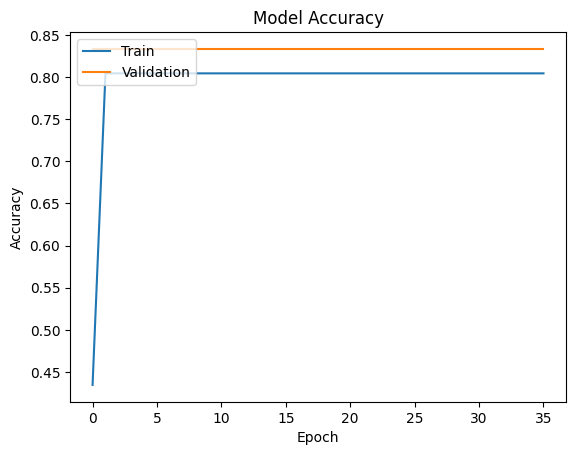

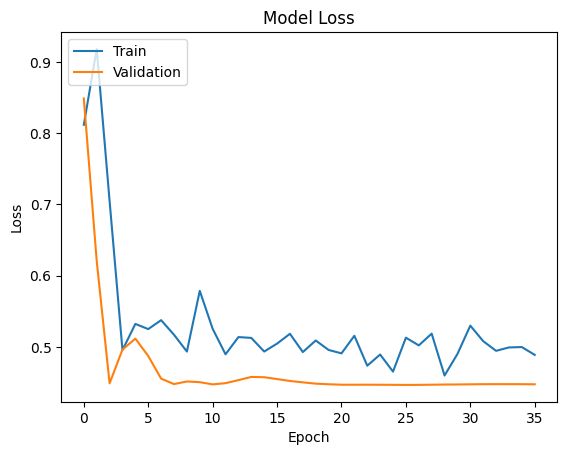

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
train_images, test_images, train_labels, test_labels = train_test_split(all_images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [68]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [69]:
# VGG16 Model

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D


base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_schedule = LearningRateScheduler(lr_scheduler)

history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, lr_schedule]
)

Epoch 1/50
2/2 [==============================] - 6s 641ms/step - loss: 0.5937 - accuracy: 0.7826 - val_loss: 0.5066 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - 1s 303ms/step - loss: 0.5406 - accuracy: 0.8043 - val_loss: 0.4506 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 3/50
2/2 [==============================] - 1s 338ms/step - loss: 0.4506 - accuracy: 0.8043 - val_loss: 0.3837 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 4/50
2/2 [==============================] - 1s 335ms/step - loss: 0.4383 - accuracy: 0.8043 - val_loss: 0.3120 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 5/50
2/2 [==============================] - 1s 327ms/step - loss: 0.4094 - accuracy: 0.8261 - val_loss: 0.2509 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 6/50
2/2 [==============================] - 1s 301ms/step - loss: 0.2701 - accuracy: 0.8261 - val_loss: 0.3588 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 7/50
2/2 [==============================] - 1s 313ms

In [72]:
test_loss, vgg_test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {vgg_test_accuracy:.4f}")

1/1 [==============================] - 0s 111ms/step - loss: 0.6756 - accuracy: 0.8000
Test Loss: 0.6756
Test Accuracy: 0.8000


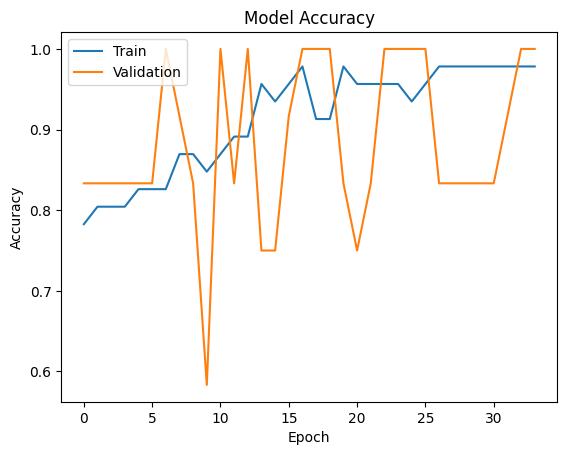

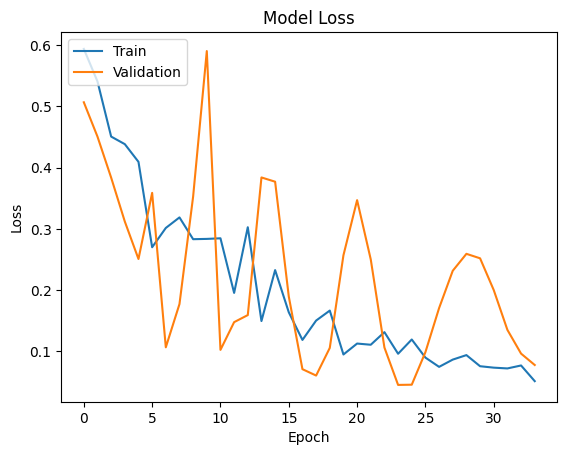

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [77]:
# Xception Model

from tensorflow.keras.applications import Xception

base_model = Xception(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lr_scheduler)

In [78]:
history_xception = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, lr_schedule]
)

Epoch 1/50
2/2 [==============================] - 48s 6s/step - loss: 0.7187 - accuracy: 0.5000 - val_loss: 0.4526 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - 1s 495ms/step - loss: 0.3973 - accuracy: 0.8913 - val_loss: 0.4029 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 3/50
2/2 [==============================] - 1s 457ms/step - loss: 0.2496 - accuracy: 0.9783 - val_loss: 0.3886 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 4/50
2/2 [==============================] - 1s 331ms/step - loss: 0.1893 - accuracy: 0.9348 - val_loss: 0.3953 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 5/50
2/2 [==============================] - 1s 329ms/step - loss: 0.1518 - accuracy: 0.9783 - val_loss: 0.4087 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 6/50
2/2 [==============================] - 1s 301ms/step - loss: 0.1226 - accuracy: 0.9783 - val_loss: 0.4210 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 7/50
2/2 [==============================] - 1s 332ms/s

In [79]:
test_loss, xception_test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {xception_test_accuracy:.4f}")

1/1 [==============================] - 2s 2s/step - loss: 0.6618 - accuracy: 0.6000
Test Loss: 0.6618
Test Accuracy: 0.6000


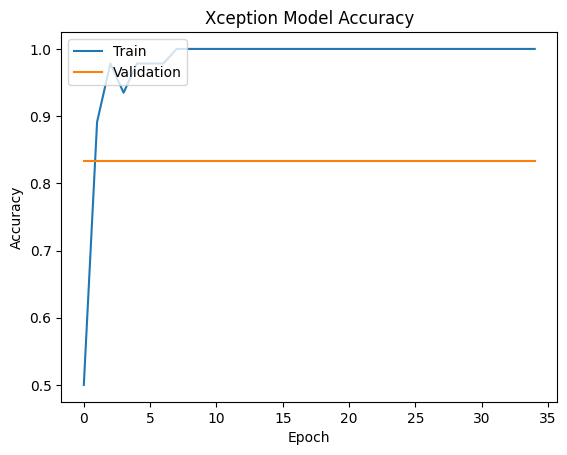

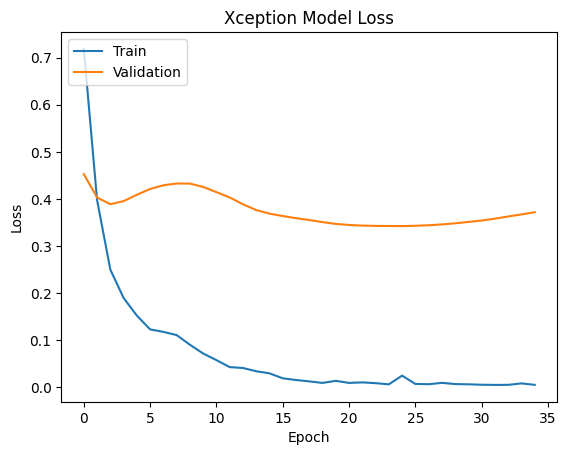

In [80]:
plt.plot(history_xception.history['accuracy'])
plt.plot(history_xception.history['val_accuracy'])
plt.title('Xception Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_xception.history['loss'])
plt.plot(history_xception.history['val_loss'])
plt.title('Xception Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [81]:
# Inception ResNet V2 Model

from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lr_scheduler)

In [82]:
history_inception_resnet_custom = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, lr_schedule]
)

Epoch 1/50
2/2 [==============================] - 117s 6s/step - loss: 0.8293 - accuracy: 0.3696 - val_loss: 0.5836 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 2/50
2/2 [==============================] - 1s 775ms/step - loss: 0.4417 - accuracy: 0.8696 - val_loss: 0.4509 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 3/50
2/2 [==============================] - 1s 392ms/step - loss: 0.2372 - accuracy: 0.9348 - val_loss: 0.4661 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 4/50
2/2 [==============================] - 1s 459ms/step - loss: 0.1798 - accuracy: 0.9130 - val_loss: 0.5230 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 5/50
2/2 [==============================] - 1s 458ms/step - loss: 0.1136 - accuracy: 0.9783 - val_loss: 0.5920 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 6/50
2/2 [==============================] - 1s 414ms/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 0.6588 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 7/50
2/2 [==============================] - 1s 401ms/

In [83]:
test_loss, inception_test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {inception_test_accuracy:.4f}")

1/1 [==============================] - 0s 125ms/step - loss: 0.6795 - accuracy: 0.6000
Test Loss: 0.6795
Test Accuracy: 0.6000


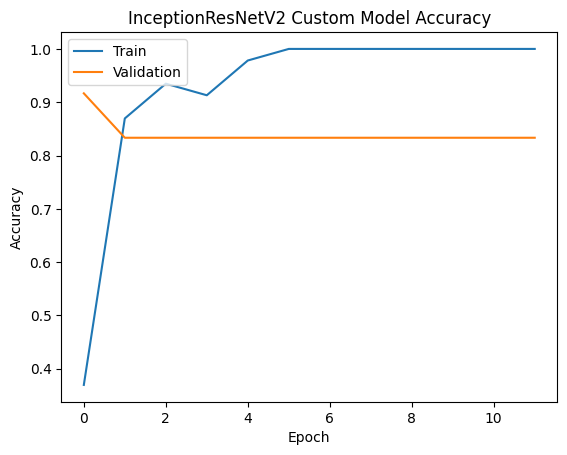

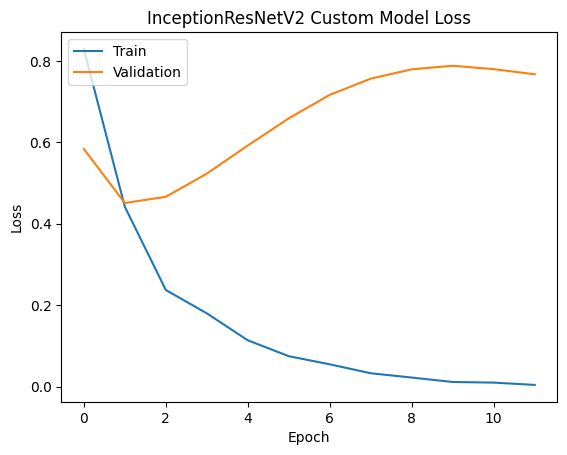

In [84]:
plt.plot(history_inception_resnet_custom.history['accuracy'])
plt.plot(history_inception_resnet_custom.history['val_accuracy'])
plt.title('InceptionResNetV2 Custom Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_inception_resnet_custom.history['loss'])
plt.plot(history_inception_resnet_custom.history['val_loss'])
plt.title('InceptionResNetV2 Custom Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
import pandas as pd

data = {
    'Model': ['CNN', 'VGG16', 'Xception', 'InceptionResNetV2'],
    'Test Accuracy': [cnn_test_accuracy, vgg_test_accuracy, xception_test_accuracy, inception_test_accuracy]
}

accuracy_df = pd.DataFrame(data)

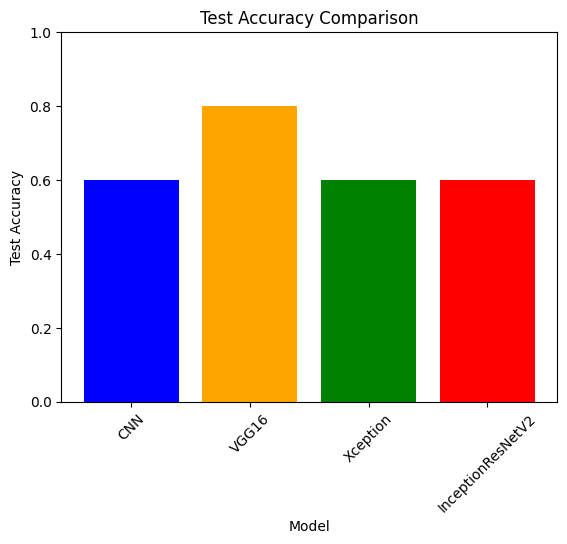

In [86]:
plt.bar(accuracy_df['Model'], accuracy_df['Test Accuracy'], color=['blue', 'orange', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

VGG16 works the best and hence we are using VGG16

In [87]:
model.save('/content/drive/My Drive/bipolar/model/vgg16_model.h5')

In [88]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/My Drive/bipolar/model/vgg16_model.h5')

In [92]:
import random

random_bipolar_images = random.sample(bipolar_images, 5)
random_non_bipolar_images = random.sample(non_bipolar_images, 5)

In [93]:
def preprocess_image(image_path, target_size):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    return img

1/1 [==============================] - 0s 35ms/step


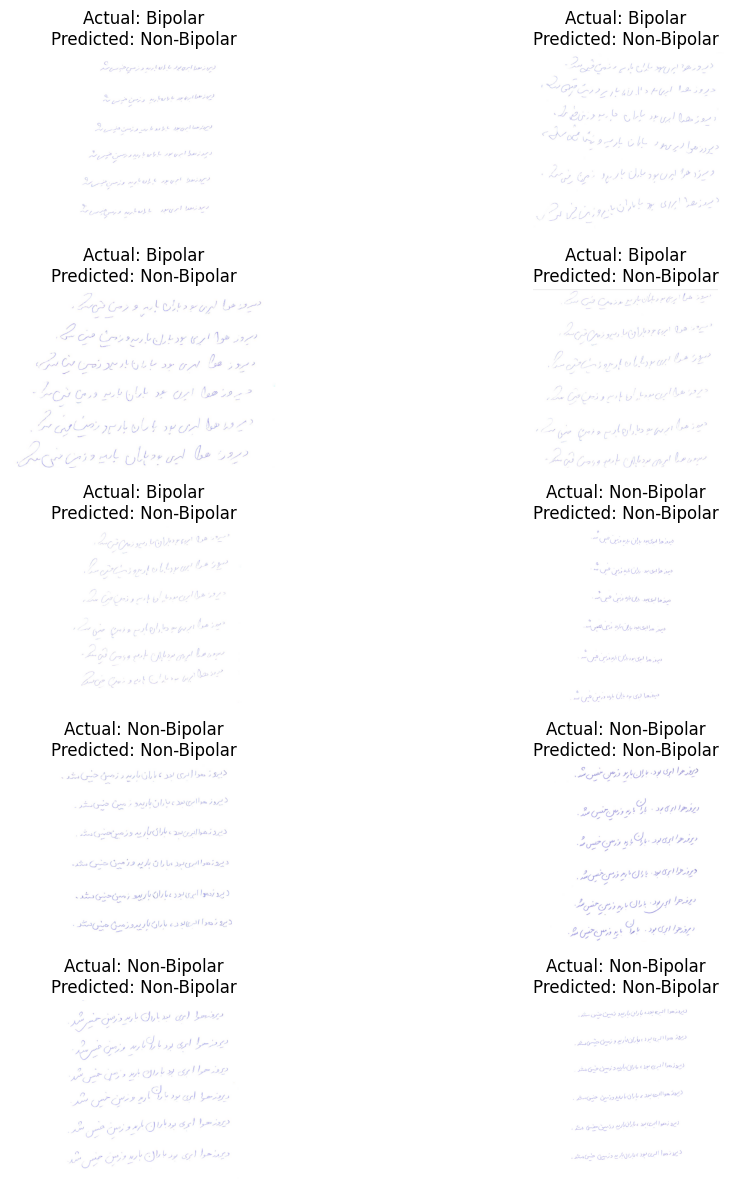

In [94]:
plt.figure(figsize=(12, 12))
for i, image_path in enumerate(random_bipolar_images + random_non_bipolar_images):
    actual_label = "Bipolar" if i < 5 else "Non-Bipolar"
    ax = plt.subplot(5, 2, i + 1)
    img = preprocess_image(image_path, (img_width, img_height))
    img = np.expand_dims(img, axis=0)
    prediction = loaded_model.predict(img)
    predicted_label = "Bipolar" if prediction[0][0] > 0.5 else "Non-Bipolar"
    plt.imshow(Image.open(image_path))
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()